## Observations and Insights 

In [200]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
metadata_results = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])
                                

metadata_results.shape

(1893, 8)

In [201]:
# Display the data table for preview
metadata_results.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [202]:
# Checking the number of mice.
Total_Mice = pd.DataFrame()
Total_mice = [mouse_metadata['Mouse ID'].nunique()]

print(f"The result is: {Total_mice}")


The result is: [249]


In [203]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateID=metadata_results.loc[metadata_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

duplicateID


array(['g989'], dtype=object)

In [204]:
# Optional: Get all the data for the duplicate mouse ID. 
index_metadata_results = metadata_results.set_index('Mouse ID')
index_metadata_results.loc['g989']



Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                           
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         20   
g989         Propriva  Female          21          26         20   
g989         Propriva  Female          21          26         25   
g989         Propriva  Female          21          26         30   
g989         Propriva  Female          21          26         35   

          Tumor Volume (mm3)  Metastatic Sites  
Mouse ID                                        
g989               45.000000                 0  
g989               45.000000                 0  
g989               48.786801                 0  
g989               47.570392                 0  
g989               51.745156                 0  
g989               49.880528                 0  
g989               51.325852                 1  
g989               53.442020                 0  
g989               55.326122                 1  
g989               54.657650                 1  
g989               56.045564                 1  
g989               59.082294                 1  
g989               62.570880                 2

In [205]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
metadata_results_clean = index_metadata_results.drop(['g989'])
metadata_results_clean.shape

(1880, 7)

In [206]:
# Checking the number of mice in the clean DataFrame.

metadata_results_clean2 = metadata_results_clean.reset_index()
Total_Mice2 = pd.DataFrame()
Total_mice = [metadata_results_clean2['Mouse ID'].nunique()]

print(f"The result is: {Total_mice}")


The result is: [248]


## Summary Statistics

In [207]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_volume = metadata_results_clean.groupby(['Drug Regimen'])
tumor_volume_mean = tumor_volume['Tumor Volume (mm3)'].mean()
tumor_volume_med = tumor_volume['Tumor Volume (mm3)'].median()
tumor_volume_var = tumor_volume['Tumor Volume (mm3)'].var()
tumor_volume_std = tumor_volume['Tumor Volume (mm3)'].std()
tumor_volume_sem = tumor_volume['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_summary = pd.DataFrame({'Mean': tumor_volume_mean, 'Median': tumor_volume_med, 'Variance': tumor_volume_var \
                             ,'standard deviation': tumor_volume_var, 'SEM': tumor_volume_sem})

tumor_summary


Mean     Median   Variance  standard deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764           24.947764  0.329346
Ceftamin      52.591172  51.776157  39.290177           39.290177  0.469821
Infubinol     52.884795  51.820584  43.128684           43.128684  0.492236
Ketapril      55.235638  53.698743  68.553577           68.553577  0.603860
Naftisol      54.331565  52.509285  66.173479           66.173479  0.596466
Placebo       54.033581  52.288934  61.168083           61.168083  0.581331
Propriva      52.320930  50.446266  43.852013           43.852013  0.544332
Ramicane      40.216745  40.673236  23.486704           23.486704  0.320955
Stelasyn      54.233149  52.431737  59.450562           59.450562  0.573111
Zoniferol     53.236507  51.818479  48.533355           48.533355  0.516398

In [208]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume2 = metadata_results_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median', 'var', 'std','sem'])
tumor_volume2                                                                                         

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

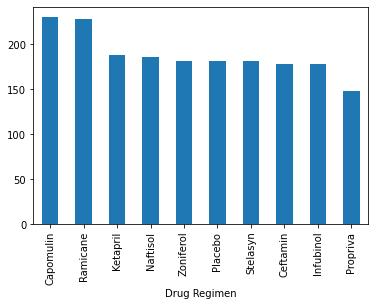

In [209]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = metadata_results_clean.groupby(['Drug Regimen'])['Timepoint'].count()
timepoints.sort_values(ascending=False).plot.bar()
plt.show()

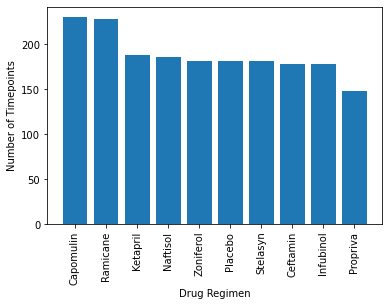

In [210]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timeppoint_sort=timepoints.sort_values(ascending=False)
plt.bar(timeppoint_sort.index, timeppoint_sort.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation = '90')
plt.show()


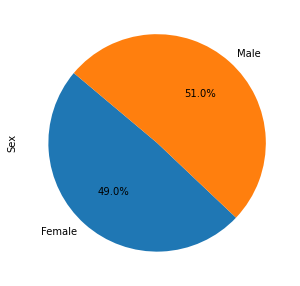

In [211]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = metadata_results_clean.groupby(['Sex'])['Sex'].count()
gender.plot.pie(startangle=140, figsize=(5,5),autopct ='%1.1f%%')
ylabel='Sex'

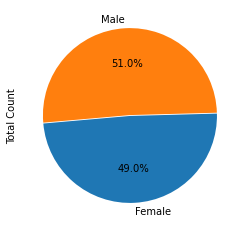

In [212]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = metadata_results_clean.groupby(['Sex'])['Sex'].count()
plt.pie(gender, labels=('Female', 'Male'), explode = (0.01,0),startangle=185, autopct='%1.1f%%')
plt.ylabel("Total Count")
plt.xticks(rotation = '90')
plt.show()

## Quartiles, Outliers and Boxplots

In [213]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_last = metadata_results_clean.groupby(['Mouse ID'])['Timepoint'].max()
timepoint_last_df = pd.DataFrame(timepoint_last)
#timepoint_last_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
result_last_timepoint = pd.merge(metadata_results_clean,timepoint_last_df, on=('Mouse ID', 'Timepoint'), how = 'right')
result_last_timepoint

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

best4_regimes_data = result_last_timepoint[result_last_timepoint['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best4_regimes_data

Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                           
a203        Infubinol  Female          20          23         45   
a251        Infubinol  Female          21          25         45   
a275         Ceftamin  Female          20          28         45   
a411         Ramicane    Male           3          22         45   
a444         Ramicane  Female          10          25         45   
...               ...     ...         ...         ...        ...   
y769         Ceftamin  Female           6          27         45   
y793        Capomulin    Male          17          17         45   
y865         Ceftamin    Male          23          26         45   
z578         Ramicane    Male          11          16         45   
z581        Infubinol  Female          24          25         45   

          Tumor Volume (mm3)  Metastatic Sites  
Mouse ID                                        
a203               67.973419                 2  
a251               65.525743                 1  
a275               62.999356                 3  
a411               38.407618                 1  
a444               43.047543                 0  
...                      ...               ...  
y769               68.594745                 4  
y793               31.896238                 2  
y865               64.729837                 3  
z578               30.638696                 0  
z581               62.754451                 3  

[100 rows x 7 columns]

In [214]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capo_tumor=[]
rami_tumor=[]
infu_tumor=[]
cert_tumor=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in result_last_timepoint.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
       capo_tumor.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
       rami_tumor.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
       infu_tumor.append(row['Tumor Volume (mm3)']) 
    if row["Drug Regimen"] == treatments[3]:
       cert_tumor.append(row['Tumor Volume (mm3)'])
            
    # add subset 
#Drug and treatment dataframe   
drug_treatment=pd.DataFrame({'Capomulin': capo_tumor, treatments[1]: rami_tumor, 
                                  treatments[2]: infu_tumor, treatments[3]: cert_tumor})
drug_treatment_min = drug_treatment.min()
drug_treatment_max = drug_treatment.max()
#drug_treatment
#drug_treatment.dtypes

# Determine outliers using upper and lower bounds
  #quartiles for Cappulin
capo_quartiles = drug_treatment[treatments[0]].quantile([.25, .5, .75])
capo_lowerq = capo_quartiles[.25]
capo_upperq = capo_quartiles[.75]
capo_iqr = capo_upperq - capo_lowerq
capo_lower_bound = capo_lowerq - (1.5*capo_iqr)
capo_upper_bound = capo_upperq + (1.5*capo_iqr)
capo_max = drug_treatment[treatments[0]].max()
capo_medq = capo_quartiles[.5]
capo_min = drug_treatment[treatments[0]].min()

# print(f"The lower quartile of Capomulin is: {capo_lowerq}")
# print(f"The upper quartile of Capomulin is: {capo_upperq}")
# print(f"The interquartile range of Capomulin is: {capo_iqr}")
# print(f"The min quartile of Capomulin is: {capo_min}")
# print(f"The median quartile of Capomulin is: {capo_medq}")
# print(f"The max quartile of Capomulin is: {capo_max}") 

print(f"Capomulin's potential outlier: {capo_lower_bound},  {capo_upper_bound}")
print(f"---------------------------------------------") 

  #quartiles for Ramicane
rami_quartiles = drug_treatment[treatments[1]].quantile([.25, .5, .75])
rami_lowerq = rami_quartiles[.25]
rami_upperq = rami_quartiles[.75]
rami_iqr = rami_upperq - rami_lowerq
rami_lower_bound = rami_lowerq - (1.5*rami_iqr)
rami_upper_bound = rami_upperq + (1.5*rami_iqr)
rami_max = drug_treatment[treatments[1]].max()
rami_medq = rami_quartiles[.5]
rami_min = drug_treatment[treatments[1]].min()

# print(f"The lower quartile of Ramicane is: {rami_lowerq}")
# print(f"The upper quartile of Ramicane is: {rami_upperq}")
# print(f"The interquartile range of Ramicane is: {rami_iqr}")
# print(f"The the median of Ramicane is: {rami_quartiles[0.5]} ")
# print(f"The min quartile of Ramicane is: {rami_min}")
# print(f"The median quartile of Ramicane is: {rami_medq}")
# print(f"The max quartile of Ramicane is: {rami_max}")
print(f"Ramicane's potential outlier: {rami_lower_bound},  {rami_upper_bound}")
print(f"---------------------------------------------") 

  #quartiles for Infubinol
infu_quartiles = drug_treatment[treatments[2]].quantile([.25, .5, .75])
infu_lowerq = infu_quartiles[.25]
infu_upperq = infu_quartiles[.75]
infu_iqr = infu_upperq - infu_lowerq
infu_lower_bound = infu_lowerq - (1.5*infu_iqr)
infu_upper_bound = infu_upperq + (1.5*infu_iqr)
infu_max = drug_treatment[treatments[2]].max()
infu_medq = infu_quartiles[.5]
infu_min = drug_treatment[treatments[2]].min()

# print(f"The lower quartile of Infubinol is: {infu_lowerq}")
# print(f"The upper quartile of Infubinol is: {infu_upperq}")
# print(f"The interquartile range of Infubinol is: {infu_iqr}")
# print(f"The min quartile of Infubinol is: {infu_min}")
# print(f"The median quartile of Infubinol is: {infu_medq}")
# print(f"The max quartile of Infubinol is: {infu_max}")
print(f"Infubinol's potential outlier: {infu_lower_bound},  {infu_min}")
print(f"---------------------------------------------") 

#quartiles for Ceftamin
ceft_quartiles = drug_treatment[treatments[3]].quantile([.25, .5, .75])
ceft_lowerq = ceft_quartiles[.25]
ceft_upperq = ceft_quartiles[.75]
ceft_iqr = ceft_upperq - ceft_lowerq
ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
ceft_max = drug_treatment[treatments[3]].max()
ceft_medq = ceft_quartiles[.5]
ceft_min = drug_treatment[treatments[3]].min()

# print(f"The lower quartile of Ceftamin is: {ceft_lowerq}")
# print(f"The upper quartile of Ceftamin is: {ceft_upperq}")
# print(f"The interquartile range of Ceftamin is: {ceft_iqr}")
# print(f"The min quartile of Ceftamin is: {ceft_min}")
# print(f"The median quartile of Ceftamin is: {ceft_medq}")
# print(f"The max quartile of Ceftamin is: {ceft_max}")
print(f"Infubinol's potential outlier: {ceft_lower_bound},  {ceft_upper_bound}")


Capomulin's potential outlier: 20.70456164999999,  51.83201549
---------------------------------------------
Ramicane's potential outlier: 17.912664470000003,  54.30681135
---------------------------------------------
Infubinol's potential outlier: 36.83290494999999,  36.3213458
---------------------------------------------
Infubinol's potential outlier: 25.355449580000002,  87.66645829999999


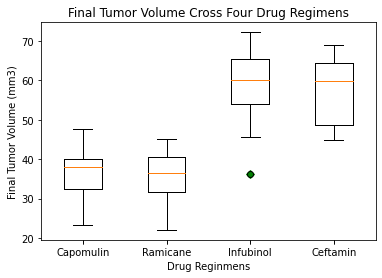

In [215]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_treatments = [drug_treatment[treatments[0]], drug_treatment[treatments[1]],\
                      drug_treatment[treatments[2]], drug_treatment[treatments[3]]]
#use boxplot from samples 
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Cross Four Drug Regimens')
ax1.set_xlabel('Drug Reginmens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(boxplot_treatments, 0, 'gD')
plt.xticks([1,2,3,4], treatments)
ax1.boxplot(boxplot_treatments,labels = treatments)
plt.show()

## Line and Scatter Plots

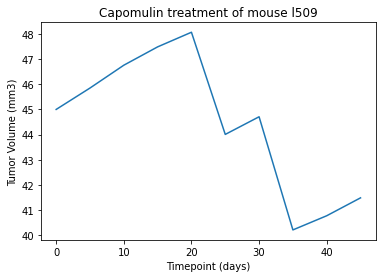

In [216]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#get dataframe for compululin treament of mouse l509

line_data = metadata_results_clean2.loc[metadata_results_clean2["Mouse ID"] == "l509",:]                                  
line_data
x_axis = line_data['Timepoint']
tumor_size = line_data['Tumor Volume (mm3)']
plt.plot(x_axis, tumor_size, linewidth = 1.5, markersize = 8)
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


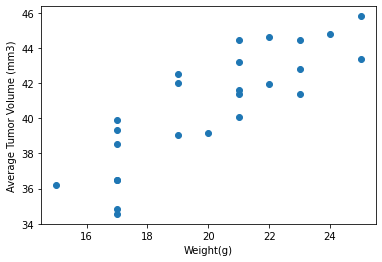

In [217]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_data = metadata_results_clean.loc[metadata_results_clean['Drug Regimen'] == 'Capomulin',:]
capo_data
capo_average = capo_data.groupby(['Mouse ID']).mean()
capo_average
plt.scatter(capo_average['Weight (g)'], capo_average['Tumor Volume (mm3)'])
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [218]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(capo_average['Weight (g)'],capo_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between both factors is {correlation}")


The correlation between both factors is 0.84


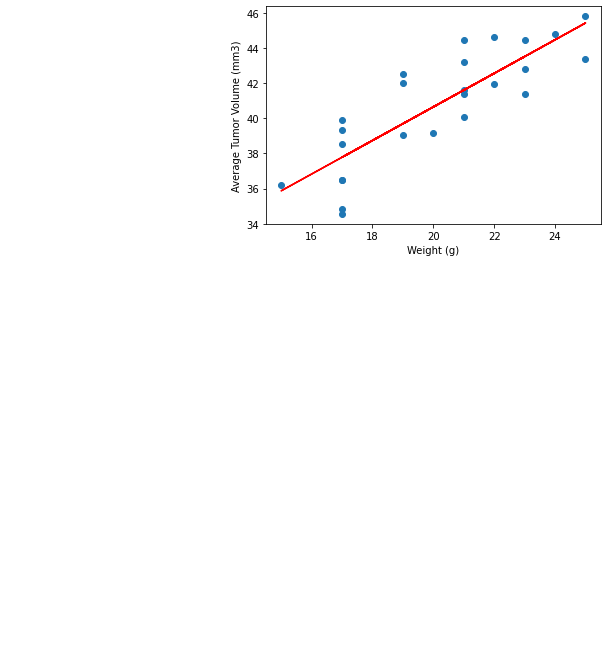

In [219]:
# calculating linear regression values and plot
x_values = capo_average['Weight (g)']
y_values = capo_average['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()